## Objective
RT-Sort manuscript figure sup 1B

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from spikeinterface import load_extractor
from spikeinterface.extractors import NwbRecordingExtractor

from tqdm import tqdm

REC_PATH = "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/probe_773592320/spike_band.si"
# Should be shape (121, 384) = (n_samples, n_elecs) and scaled to uV
TEMPLATES_AVERAGE_PATH = "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/probe_773592320/spikesort_matlab4/waveforms/templates/templates_average.npy"
TEMPLATES_STD_PATH = "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/probe_773592320/spikesort_matlab4/waveforms/templates/templates_std.npy"

In [2]:
recording = load_extractor(REC_PATH)  # type: NwbRecordingExtractor
locations = recording.get_channel_locations()

In [3]:
# # Find a specific unit based on max-amp channel by specifying location boundaries of where it could be
# X_MIN = 400
# X_MAX = 450
# Y_MIN = 1500  
# Y_MAX = 1600  
# ##
# all_templates = np.load(TEMPLATES_AVERAGE_PATH, mmap_mode="r")
# for i in range(all_templates.shape[0]):
#     chan = np.argmin(np.min(all_templates[i], axis=0))
#     x, y = locations[chan]
#     if X_MIN <= x <= X_MAX and Y_MIN <= y <= Y_MAX:
#         print(i, locations[chan])

92 [ 437.5 1557.5]
93 [ 437.5 1557.5]
97 [ 402.5 1522.5]
111 [ 437.5 1557.5]


100%|██████████| 384/384 [00:00<00:00, 12045.30it/s]


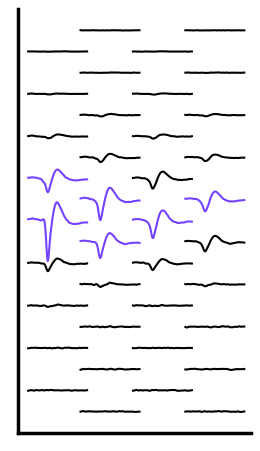

In [44]:
XLIM = (2, 73) 
# YLIM = (1400, 1700)
AMP_THRESH = 36
NORM_STD_THRESH = 0.6
UNIT_IDX = 101

SAVE_PATH = "/data/MEAprojects/RT-Sort/figures/supplementary/1B_1ms_before_2ms_after"
##

# Plot waveforms
templates_mean = np.load(TEMPLATES_AVERAGE_PATH, mmap_mode="r")[UNIT_IDX].T
templates_std = np.load(TEMPLATES_STD_PATH, mmap_mode="r")[UNIT_IDX].T
arange = np.arange(templates_mean.shape[0])
peaks = np.argmax(np.abs(templates_mean), axis=1)
amps = np.abs(templates_mean[arange, peaks])
curation = (amps >= AMP_THRESH) * (templates_std[arange, peaks] / amps <= NORM_STD_THRESH)
templates_mean = templates_mean[:, 30:]  # 1ms before and 2ms after

chan_max = np.argmax(np.max(np.abs(templates_mean), axis=1))
chan_max_y = locations[chan_max, 1]
YLIM_BUFFER = 200
YLIM = (chan_max_y-YLIM_BUFFER, chan_max_y+YLIM_BUFFER)

fig, ax = plt.subplots(1, figsize=(3, 5.5))
for chan in tqdm(range(len(curation))):
    x, y = locations[chan]
    if not (XLIM[0] < x < XLIM[1] and YLIM[0] < y < YLIM[1]): continue

    color = "#7542ff" if curation[chan] else "black"

    # if color == "black":
    #     print(x, y, amps[chan])

    temp = templates_mean[chan]

    temp = temp * 0.21
    loc = locations[chan]

    x = np.arange(temp.size, dtype=float) - 30
    x *= 0.2

    x += loc[0]
    temp += loc[1]

    # for wf in waveforms[:, :, chan]:
    #     ax.plot(x, wf*3/6.295 + loc[1], color="#bbbbbb")
    ax.plot(x, temp, color=color, alpha=1)

ax.set_ylim(YLIM)
ax.set_xlim(XLIM)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase thickness of the bottom and left spines
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

# Increase thickness of tick marks
ax.tick_params(axis='both', direction='out', length=6, width=2.5, colors='black')

# Hide labels
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_xticks([])
ax.set_yticks([])

plt.savefig(SAVE_PATH, format="svg")

plt.show()